In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
chain = np.load('../code/chain.npy')

2.2265391629943503 17.344450359362302


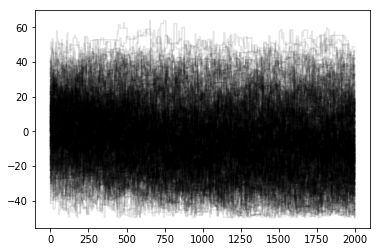

In [185]:
i = 6
plt.plot(chain[0:,1000:,i].T, 'k', alpha=0.1)
print(np.median(chain[:,:,i]), np.std(chain[:,:,i]))
plt.show()

In [186]:
sc = np.shape(chain)

In [187]:
clip = 2000
igburn = chain[:,clip:,:].flatten().reshape(sc[0]*(sc[1]-clip),sc[2])

si = np.shape(igburn)
rand = np.random.randint(0, si[0], 100)

In [188]:
rand

array([208359, 103656,   7317, 394216, 384788, 451080, 460893, 481503,
       232088, 460925, 166381, 254766, 324497, 265474, 219963, 484873,
       360583, 356023,  57558, 260376, 436522, 332635, 406500, 169043,
         3934,   8557, 216015, 187261, 213142, 249041, 115039,  78621,
       385396, 283276, 456542, 316973,   2358, 317508, 350296, 435707,
       268190, 117819,  94486, 199615, 233935,   2329, 311645, 137989,
       261191, 103667, 204689, 322375, 183712, 292363, 300990, 395825,
        45226,   7442, 287583, 142412, 213157, 131914, 412651, 481921,
        20996, 151802,  98504, 102542, 217640, 261512, 462526, 226257,
       244702, 107829, 104607, 469812, 287865, 145611,  32494, 153619,
       156978, 284969, 367021, 470326, 487315, 156305, 346694, 360551,
        74428,  93042, 327224, 428831, 485024, 491953,  78789, 449217,
       386899, 254401, 415161, 184005])

In [189]:
import starry
time, vels, verr = np.loadtxt('../data/transit.vels', usecols=[0,1,2], unpack=True)
time -= 2458706.5
map = starry.Map(ydeg=4, udeg=2, rv=True, lazy=False)
map.reset()

Prot = 2.85             # days
P = 8.1387              # days
e = 0.0
w = 0.0
inc = 90.0

tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0

def rmcurve(tarr, params):

    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, gamma3, gamma4, jitter_good, jitter_bad, q, factor, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.inc = inc
    map.obl = obl
    # map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq

    f = (tarr - t0) / P * 2 * np.pi
    I = np.arccos(b / a)

    zo = a * np.cos(f)
    yo = -a * np.sin(np.pi / 2 + f) * np.cos(I)
    xo = a * np.sin(f) * np.sin(I)

    theta = 360.0 / Prot * tarr

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    trend = gamma + gammadot * (tarr - 0.15) + gammadotdot * (tarr - 0.15) ** 2 + gamma3*(tarr-0.15)**3 + gamma4*(tarr-0.15)**4
    rv = rv_0 + trend
    
    return rv, trend

In [190]:
tarr = np.arange(0, 0.5, 0.001)
rv_out = np.zeros((100, len(tarr)))
trend_out = np.zeros((100, len(tarr)))

for i in range(100):
    rv_out[i], trend_out[i] = rmcurve(tarr, igburn[rand[i]])

Compiling `rv`... Done.


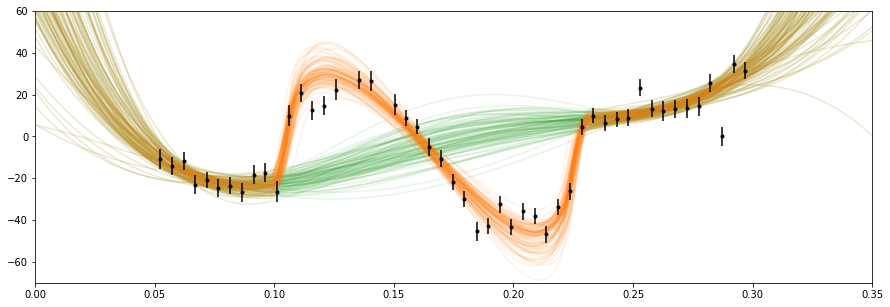

In [192]:
plt.figure(figsize=(15,5))

plt.plot(tarr, rv_out.T, 'C1', alpha=0.1, zorder=3)
plt.plot(tarr, trend_out.T, 'C2', alpha=0.1)

plt.errorbar(time, vels, yerr=verr, fmt='k.', zorder=5)

plt.ylim(-70, 60)
plt.xlim(0.0, 0.35)

plt.show()
